### Dia 3: Análise Exploratória por Datetime

In [2]:
import import_ipynb
import Dia_2

import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dados = Dia_2.dados

#### Convertendo coluna "data_emprestimo" para datetime

In [4]:
dados["data_emprestimo"] = pd.to_datetime(dados["data_emprestimo"])

dados["data_emprestimo"]

0         2010-01-04 07:44:10.721
1         2010-01-04 07:44:10.750
2         2010-01-04 08:08:44.081
3         2010-01-04 08:24:21.284
4         2010-01-04 08:27:33.569
                    ...          
2072517   2020-05-05 19:51:06.059
2072518   2020-05-05 19:51:06.135
2072519   2020-05-05 19:51:06.164
2072520   2020-06-09 11:54:02.669
2072521   2020-06-09 11:54:02.852
Name: data_emprestimo, Length: 2072522, dtype: datetime64[ns]

#### Verificando relação entre id_emprestimo e exemplar

In [5]:
dados["id_emprestimo"].value_counts()

id_emprestimo
2772079     3
2010326     3
2014596     3
10240112    3
2595954     3
           ..
1523986     1
1523984     1
1523983     1
1523981     1
2989090     1
Name: count, Length: 2068724, dtype: int64

#### Quantidade de empréstimos

In [6]:
qtd_emprestimos = len(dados["id_emprestimo"].drop_duplicates())

qtd_emprestimos

2068724

#### Quantidade de exemplares emprestados

In [7]:
qtd_exemplares_emprestados = len(dados)

qtd_exemplares_emprestados

2072522

#### Analisando quantidade de exemplares emprestados por ano

In [8]:
dados_anos = pd.DataFrame(dados["data_emprestimo"].dt.year.value_counts()).reset_index()
dados_anos.columns = ["ano", "quantidade"]

dados_anos

,ano,quantidade
0,2013,234749
1,2012,221365
2,2014,219189
3,2017,218462
4,2016,215900
5,2015,213582
6,2011,196390
7,2018,194080
8,2019,171801
9,2010,161394


#### Plotando gráfico

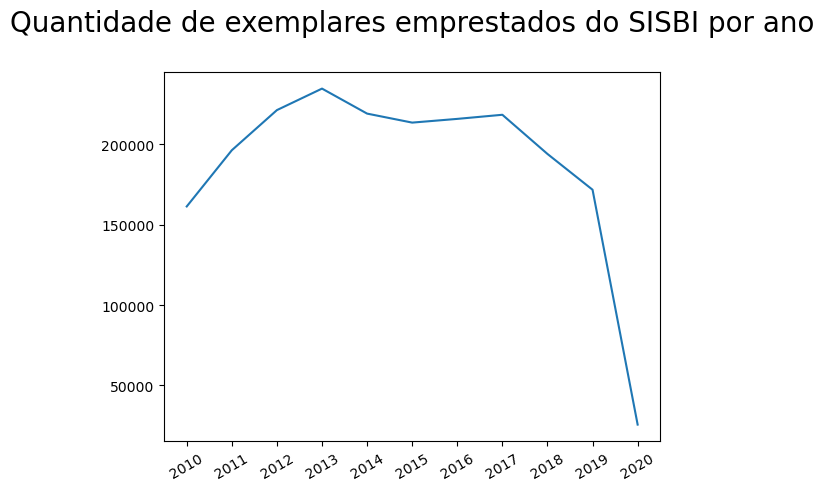

In [9]:
ax = sns.lineplot(data=dados_anos, x="ano", y="quantidade")
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.set_xticks(range(2010, 2021), labels=range(2010, 2021))

ax.set_title("Quantidade de exemplares emprestados do SISBI por ano"+"\n",size=20,loc="center")

ax=ax

#### Analisando quantidade de empréstimos por mês

In [10]:
dados_mes = pd.DataFrame(dados["data_emprestimo"].dt.month.value_counts()).reset_index()
dados_mes.columns = ["mês", "quantidade"]

dados_mes

,mês,quantidade
0,3,252185
1,8,232793
2,2,210200
3,4,208725
4,9,208234
5,5,202530
6,10,188410
7,11,164222
8,6,138123
9,7,123790


#### Plotando gráfico

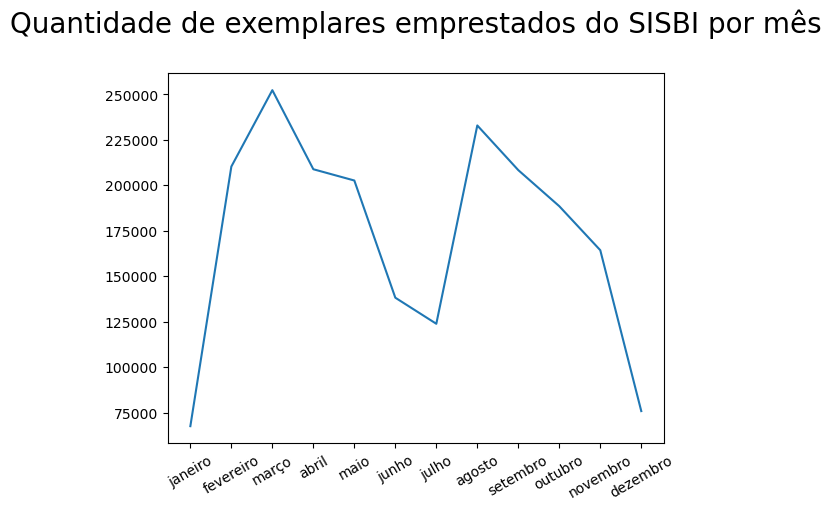

In [ ]:
ax = sns.lineplot(data=dados_mes, x="mês", y="quantidade")
ax.set(xlabel=None,ylabel=None) # Tirar rótulo dos eixos
ax.set_xticks(range(1,13), rotation=30, labels=["janeiro", "fevereiro", "março", "abril",
                                                "maio", "junho", "julho", "agosto",
                                                "setembro", "outubro", "novembro", "dezembro"])

ax.set_title("Quantidade de exemplares emprestados do SISBI por mês"+"\n",size=20,loc="center")

ax=ax

#### Analisando quantidade de empréstimos por horário

In [12]:
dados_horario = pd.DataFrame(dados["data_emprestimo"].dt.hour.value_counts()).reset_index()
dados_horario.columns = ["hora", "quantidade"]

dados_horario

,hora,quantidade
0,16,210655
1,10,185839
2,17,185340
3,18,182520
4,11,180048
5,15,166672
6,14,150876
7,12,148754
8,9,131273
9,20,127716


In [13]:
dados_horario = dados_horario.sort_values(ascending=True,by="quantidade")

dados_horario

,hora,quantidade
18,6,14
17,0,17
16,23,51
15,22,247
14,7,18777
13,21,51191
12,19,102129
11,8,103416
10,13,126987
9,20,127716


#### Plotando gráfico

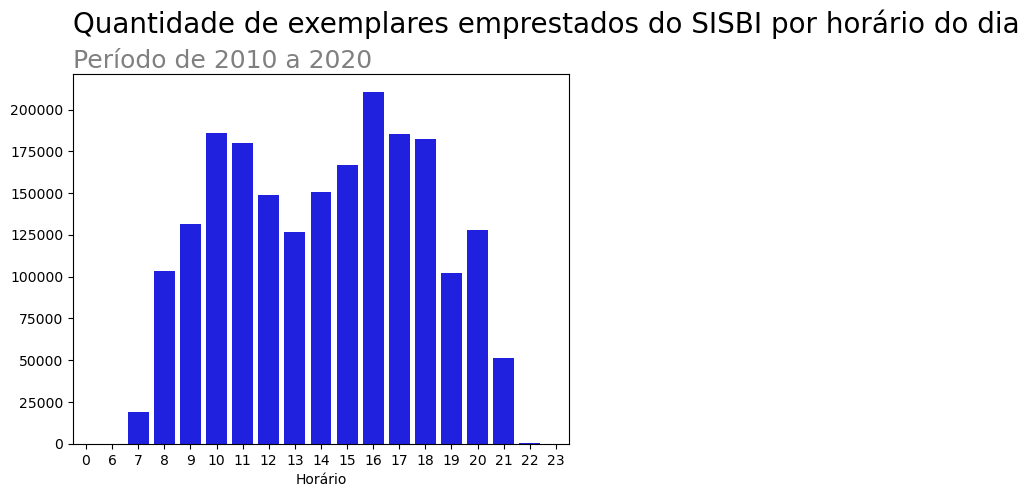

In [ ]:
ax = sns.barplot(data=dados_horario, y="quantidade", x="hora", color="Blue")
plt.legend([],[], frameon=False) # Retirar legenda                                               

ax.set(xlabel='Horário',ylabel=None)    
ax.set_title("Quantidade de exemplares emprestados do SISBI por horário do dia"+"\n",size=20,loc="left")
ax.text(s="Período de 2010 a 2020", x=-0.5, y=225000, fontsize=18, ha="left", color="gray")
ax=ax